In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [83]:
class Model(nn.Module):
    
    def __init__(self , in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [84]:
model = Model()

In [85]:
df = pd.read_csv("iris.csv")

In [86]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


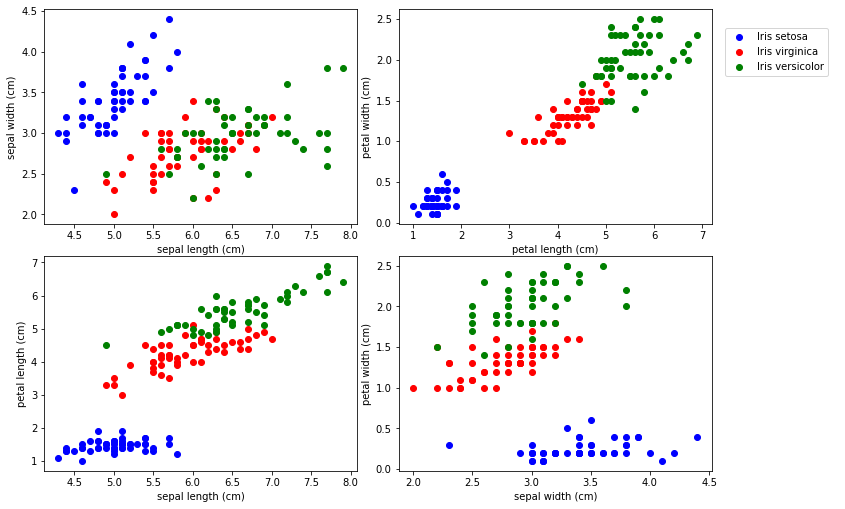

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set( xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [88]:
X = df.drop('target',axis=1)
y = df['target']

In [89]:
X = X.values
y = y.values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train , X_test , y_train, y_test = train_test_split(X ,y , test_size=0.2)

In [92]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [93]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [95]:
model.parameters()


<generator object Module.parameters at 0x000000EE2FDAF200>

In [96]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [97]:
epochs = 100
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred , y_train)
    losses.append(loss)
    
    if i%5==0:
        print(f"epoch {i}  and loss : {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0  and loss : 1.0596061944961548
epoch 5  and loss : 0.9099002480506897
epoch 10  and loss : 0.7697465419769287
epoch 15  and loss : 0.6339987516403198
epoch 20  and loss : 0.5263345241546631
epoch 25  and loss : 0.45698878169059753
epoch 30  and loss : 0.40517479181289673
epoch 35  and loss : 0.3564651608467102
epoch 40  and loss : 0.3060322105884552
epoch 45  and loss : 0.2556209862232208
epoch 50  and loss : 0.20908814668655396
epoch 55  and loss : 0.17015084624290466
epoch 60  and loss : 0.14008377492427826
epoch 65  and loss : 0.11788156628608704
epoch 70  and loss : 0.10206075757741928
epoch 75  and loss : 0.09135599434375763
epoch 80  and loss : 0.08373524248600006
epoch 85  and loss : 0.07826849818229675
epoch 90  and loss : 0.07418663799762726
epoch 95  and loss : 0.0710807517170906


Text(0.5, 0, 'Epoch')

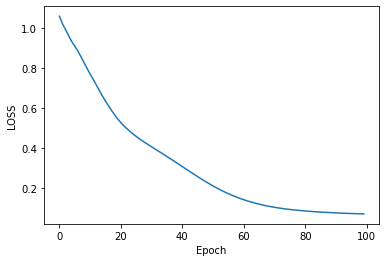

In [98]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [99]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval , y_test)

In [100]:
loss

tensor(0.0473)

In [101]:
correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f"{i+1}.)  {str(y_val)}      {y_test[i]}")
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f"we got {correct} correct!")

1.)  tensor([-16.2783,   5.2815,  17.7569])      2
2.)  tensor([-11.2681,   5.5887,  12.7126])      2
3.)  tensor([-10.1214,   6.0181,  11.4668])      2
4.)  tensor([-6.7655,  7.7216,  8.1002])      2
5.)  tensor([-2.4103,  6.5585,  3.3436])      1
6.)  tensor([-10.1587,   4.6096,  11.4632])      2
7.)  tensor([0.1821, 7.8217, 1.1449])      1
8.)  tensor([-10.2472,   5.5837,  11.5053])      2
9.)  tensor([0.0945, 6.6337, 1.0622])      1
10.)  tensor([0.4260, 6.4984, 0.7618])      1
11.)  tensor([-9.0072,  5.9176, 10.3249])      2
12.)  tensor([13.4614,  7.7565, -9.1168])      0
13.)  tensor([ 2.8904,  6.8329, -1.3181])      1
14.)  tensor([-11.2246,   6.0264,  12.7357])      2
15.)  tensor([-10.8027,   5.2866,  12.2916])      2
16.)  tensor([-1.3089,  6.1711,  2.2698])      1
17.)  tensor([1.2365, 6.4662, 0.0536])      1
18.)  tensor([-9.4272,  5.4653, 10.8657])      2
19.)  tensor([14.3932,  8.2813, -9.7468])      0
20.)  tensor([-13.5671,   4.7760,  15.1409])      2
21.)  tensor([-2.